### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
%matplotlib inline


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# First it is good to check number of rows and columns, the dimension, and summary of the data

In [4]:
data.index

RangeIndex(start=0, stop=12684, step=1)

In [5]:
data.columns 

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [7]:
data.shape

(12684, 26)

Summary:The above information, the dataset has 12684 entries and 26 columns. Each entries has a 1 step.

# Get some descriptive statistics of the dataset

In [8]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


The describe function only provided the statitcal information for columns of the dataset that has only numerical value.

Note from descriptive statistics:

From this above statistics we have seen that min,max,mean, std, and quartils of the dataset that has a numeric value column.


# 2. Investigate the dataset for missing or problematic data.

Suggestion: Befor we start to add and delete the missing data, it is good idea to have a copy of the original data

In [9]:
data_copy=data.copy()

In [10]:
# Now I can add and drop from the data
pd.options.display.max_columns=None
data.head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1


In [11]:
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

# To check the missing values from the dataset, isnull() function is a good tool to perform it

In [12]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

summary: The results from the above .isnull() function, the columns car,Bar,coffeehouse,carryAway,RestaurantLessThan20,and
          Restaurant20To50 has a missing values. 

In [13]:
data.isnull().sum()/data.shape[0]*100

destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
expiration               0.000000
gender                   0.000000
age                      0.000000
maritalStatus            0.000000
has_children             0.000000
education                0.000000
occupation               0.000000
income                   0.000000
car                     99.148534
Bar                      0.843582
CoffeeHouse              1.710817
CarryAway                1.190476
RestaurantLessThan20     1.024913
Restaurant20To50         1.490066
toCoupon_GEQ5min         0.000000
toCoupon_GEQ15min        0.000000
toCoupon_GEQ25min        0.000000
direction_same           0.000000
direction_opp            0.000000
Y                        0.000000
dtype: float64

# Since most columns has no missing value, the ratio is 0.00. Lets grap only columns that has a missing value, greater than 0

In [14]:
for columns in data.columns:
    if data[columns].isnull().sum()>0:
        print(columns,':missing data in percentage is %.2f%%' %(data[columns].isnull().sum()/data[columns].shape[0]*100))

car :missing data in percentage is 99.15%
Bar :missing data in percentage is 0.84%
CoffeeHouse :missing data in percentage is 1.71%
CarryAway :missing data in percentage is 1.19%
RestaurantLessThan20 :missing data in percentage is 1.02%
Restaurant20To50 :missing data in percentage is 1.49%


summary:
From the above result car column has huge number of value missing. It has more that 99% missing value.
 So, since this column has a huge number of missing values, it is quite had to fill it and give to machine. probablly, our result will affect by this decision. The good idea is its better to drop the column.
 
 The other columns such as Bar,coffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50 each column has below 2% missing values. Better decision to think what to fill than droping them.  
 
 Problematic columns:
 
The income,RestaurantLessThan20, and Restaurant20To50 are columns that have a numeric value but still have problem.

Income has an object types, eventhough It has a 0 missing value. This problem comes becuase of the 
'-' 
RestaurantLessThan20 and Restaurant20To50 the problem comes becuase of the special charater "~".

In [219]:
# lets start to fill the CoffeeHouse 
# lets see first the unique of the data

print(data['CoffeeHouse'].unique())
print('\n')
print(data['Bar'].unique())
print('\n')
print(data['CarryAway'].unique())
print('\n')
print(data['RestaurantLessThan20'].unique())
print('\n')
print(data['Restaurant20To50'].unique())

['never' 'less1' '4~8' '1~3' 'gt8' nan]


['never' 'less1' '1~3' 'gt8' nan '4~8']


[nan '4~8' '1~3' 'gt8' 'less1' 'never']


['4~8' '1~3' 'less1' 'gt8' nan 'never']


['1~3' 'less1' 'never' 'gt8' '4~8' nan]


<AxesSubplot:xlabel='CoffeeHouse', ylabel='Count'>

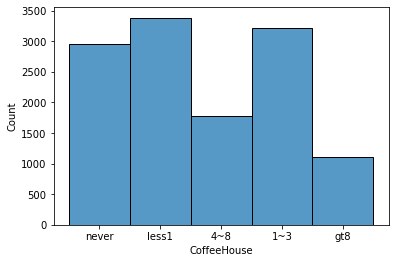

In [220]:
sns.histplot(data=data,x ='CoffeeHouse')

In [221]:
print(data['CoffeeHouse'].value_counts())
print('\n')
print(data['Bar'].value_counts())
print('\n')
print(data['CarryAway'].value_counts())
print('\n')
print(data['RestaurantLessThan20'].value_counts())
print('\n')
print(data['Restaurant20To50'].value_counts())
print('\n')

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64


never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64


1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64


1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64


less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64




In [222]:
data['CoffeeHouse']=data['CoffeeHouse'].replace('never','0')
data['CoffeeHouse']=data['CoffeeHouse'].replace('less1','1')
data['CoffeeHouse']=data['CoffeeHouse'].replace('1~3','2')
data['CoffeeHouse']=data['CoffeeHouse'].replace('4~8','6')
data['CoffeeHouse']=data['CoffeeHouse'].replace('gt8','8')


data['Bar']=data['Bar'].replace('never','0')
data['Bar']=data['Bar'].replace('less1','1')
data['Bar']=data['Bar'].replace('1~3','2')
data['Bar']=data['Bar'].replace('4~8','6')
data['Bar']=data['Bar'].replace('gt8','8')


data['CarryAway']=data['CarryAway'].replace('never','0')
data['CarryAway']=data['CarryAway'].replace('less1','1')
data['CarryAway']=data['CarryAway'].replace('1~3','2')
data['CarryAway']=data['CarryAway'].replace('4~8','6')
data['CarryAway']=data['CarryAway'].replace('gt8','8')

data['RestaurantLessThan20']=data['RestaurantLessThan20'].replace('never','0')
data['RestaurantLessThan20']=data['RestaurantLessThan20'].replace('less1','1')
data['RestaurantLessThan20']=data['RestaurantLessThan20'].replace('1~3','2')
data['RestaurantLessThan20']=data['RestaurantLessThan20'].replace('4~8','6')
data['RestaurantLessThan20']=data['RestaurantLessThan20'].replace('gt8','8')

data['Restaurant20To50']=data['Restaurant20To50'].replace('never','0')
data['Restaurant20To50']=data['Restaurant20To50'].replace('less1','1')
data['Restaurant20To50']=data['Restaurant20To50'].replace('1~3','2')
data['Restaurant20To50']=data['Restaurant20To50'].replace('4~8','6')
data['Restaurant20To50']=data['Restaurant20To50'].replace('gt8','8')


In [223]:
data['CoffeeHouse'].unique()

array(['0', '1', '6', '2', '8', nan], dtype=object)

<AxesSubplot:xlabel='CoffeeHouse', ylabel='Count'>

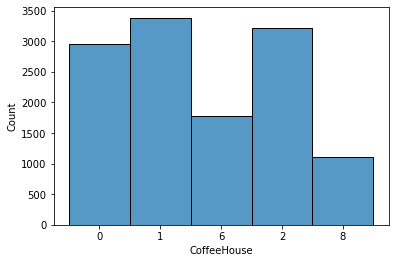

In [224]:
sns.histplot(data=data, x='CoffeeHouse')

In [236]:
# since our dtype for data['CoffeeHouse'] is object we can get men,max or sum
# lets first convert to int

data['CoffeeHouse']=pd.to_numeric(data['CoffeeHouse'])
data['CoffeeHouse'].dtypes

data['Bar']=pd.to_numeric(data['Bar'])
data['Bar'].dtypes

data['CarryAway']=pd.to_numeric(data['CarryAway'])
data['CarryAway'].dtypes

data['RestaurantLessThan20']=pd.to_numeric(data['RestaurantLessThan20'])
data['RestaurantLessThan20'].dtypes

data['Restaurant20To50']=pd.to_numeric(data['Restaurant20To50'])
data['Restaurant20To50'].dtypes

dtype('float64')

In [237]:
data['CoffeeHouse'].fillna(data['CoffeeHouse'].median(skipna=True), inplace=True)
data['Bar'].fillna(data['Bar'].median(skipna=True), inplace=True)
data['CarryAway'].fillna(data['CarryAway'].median(skipna=True), inplace=True)
data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].median(skipna=True), inplace=True)
data['Restaurant20To50'].fillna(data['Restaurant20To50'].median(skipna=True), inplace=True)

In [238]:
# lets start to fill the CoffeeHouse 
# lets see first the unique of the data

data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [239]:
data.dtypes

destination              object
passanger                object
weather                  object
temperature               int64
time                     object
coupon                   object
expiration               object
gender                   object
age                      object
maritalStatus            object
has_children              int64
education                object
occupation               object
income                   object
car                      object
Bar                     float64
CoffeeHouse               int32
CarryAway               float64
RestaurantLessThan20    float64
Restaurant20To50        float64
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
toCoupon_GEQ25min         int64
direction_same            int64
direction_opp             int64
Y                         int64
dtype: object

In [240]:
data['CarryAway'].value_counts()

2.0    4823
6.0    4258
1.0    1856
8.0    1594
0.0     153
Name: CarryAway, dtype: int64

# count each unique of the column using 

value_counts() function 

In [13]:
# to know the total number of customers has accepted or rejected

data['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

Text(0, 0.5, 'Y total number for each unique')

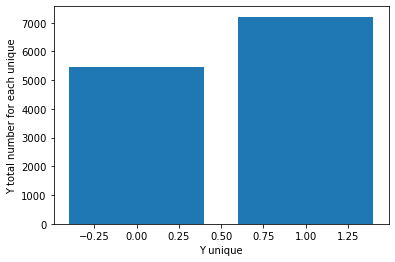

In [17]:
# lets see this on graph

plt.bar(data['Y'].unique(),data['Y'].value_counts())
plt.xlabel('Y unique')
plt.ylabel('Y total number for each unique')

In [22]:
# ratio of each
print('The total percentage of customers who accepted the coupn is %.2f%%' %(data['Y'].value_counts()[1]/data.shape[0]*100))
print('The total percentage of customers who rejected the coupn is %.2f%%' %(data['Y'].value_counts()[0]/data.shape[0]*100))


The total percentage of customers who accepted the coupn is 56.84%
The total percentage of customers who rejected the coupn is 43.16%


So, from the above bar graph and total percentage ratio calculation, I have concluded from the total number of coupons amazon had sent, more 56% were accepted by the customers and under 43% are rejected. 

Conclusion: Amazon can know that higher numbers of coupons had accepted

# Which coupn is more likely accepted?

In [108]:
print(data['coupon'].unique())
print('\n')
print(data['coupon'].nunique())

TypeError: 'list' object is not callable

In [71]:
datacoupon_unique=['Coffee House','Restaurant(<20)', 'Carry out & Take away', 'Bar', 'Restaurant(20-50)']

In [72]:
data['coupon'].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

<BarContainer object of 5 artists>

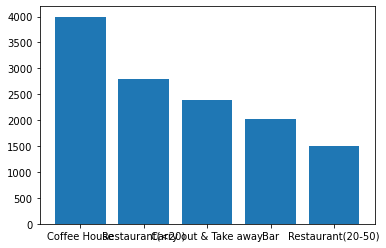

In [74]:
plt.bar(datacoupon_unique,data['coupon'].value_counts())

In [113]:
# ratio of each
print('The percentage of coupons accepted from coffee house is %.2f%%' %(data['coupon'].value_counts()[0]/data.shape[0]*100),)
print('The percentage of coupons accepted from Restaurant(<20) is %.2f%%' %(data['coupon'].value_counts()[1]/data.shape[0]*100),)
print('The percentage of coupons accepted from Carry out & Take away is %.2f%%' %(data['coupon'].value_counts()[2]/data.shape[0]*100),)
print('The percentage of coupons accepted from bar is %.2f%%' %(data['coupon'].value_counts()[3]/data.shape[0]*100),)
print('The percentage coupons accepted from Restaurant(20-50) is %.2f%%' %(data['coupon'].value_counts()[4]/data.shape[0]*100))

The percentage of coupons accepted from coffee house is 31.50%
The percentage of coupons accepted from Restaurant(<20) is 21.96%
The percentage of coupons accepted from Carry out & Take away is 18.87%
The percentage of coupons accepted from bar is 15.90%
The percentage coupons accepted from Restaurant(20-50) is 11.76%


Summary: 

From the above information about the coupon providers, the coffee house get higher number of coupon acceptance by the customers 
with 31.50% acceptance and Restaurant(20-50) get low number of coupon acceptance by the coustomers.

So, amazon can aware that most number of customers loves coupons from the coffee house. It is good to send more a coffee house coupon than the others.
    

In [115]:
data.head(1)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1


In [116]:
data['passenger'].

KeyError: 'passenger'

In [14]:
data['occupation'].nunique()

25

In [15]:
data['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [25]:
data[data['Y']==1]['occupation'].value_counts()

Unemployed                                   1025
Student                                       967
Computer & Mathematical                       798
Sales & Related                               615
Education&Training&Library                    494
Management                                    493
Office & Administrative Support               384
Arts Design Entertainment Sports & Media      326
Business & Financial                          310
Retired                                       227
Food Preparation & Serving Related            174
Healthcare Support                            169
Healthcare Practitioners & Technical          165
Transportation & Material Moving              130
Community & Social Services                   118
Protective Service                            113
Architecture & Engineering                    111
Construction & Extraction                     106
Legal                                         103
Life Physical Social Science                   98


<BarContainer object of 25 artists>

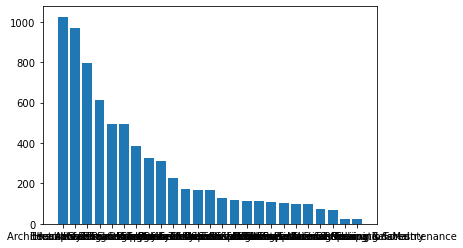

In [24]:
plt.bar(data[data['Y']==1]['occupation'].unique(),data[data['Y']==1]['occupation'].value_counts())

2. Investigate the dataset for missing or problematic data.

3. Decide what to do about your missing data -- drop, replace, other...

4. What proportion of the total observations chose to accept the coupon? 



5. Use a bar plot to visualize the `coupon` column.

6. Use a histogram to visualize the temperature column.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


2. What proportion of bar coupons were accepted?


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  